In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import pandas
from numpy import where, log as nplog
import seaborn as sns

# Preliminaries

We need to take a first look at the data and seperate variables between numerical ones and categorical ones

In [4]:
frame = pandas.read_csv("marketing_data.csv").set_index("ID")
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1826 to 4070
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null 

- It is clear from both the name of the variables and the data type that `Education`, `Marital_Status`, and `Country` are all categorical variables

In [5]:
frame[['Education', 'Marital_Status', 'Country']].describe()

,Education,Marital_Status,Country
count,2240,2240,2240
unique,5,8,8
top,Graduation,Married,SP
freq,1127,864,1095


- We now look into a sample of the table to inspect typical values of the variables

In [6]:
frame.sample(10).T

ID,143,4994,5868,9323,2549,10242,618,5304,10708,10343
Year_Birth,1970,1943,1980,1949,1983,1966,1977,1974,1978,1991
Education,Graduation,Master,Graduation,Master,PhD,PhD,PhD,PhD,2n Cycle,2n Cycle
Marital_Status,Single,Single,Married,Together,Together,Together,Married,Single,Single,Single
Income,61209.0,77598.0,19107.0,49912.0,21840.0,47472.0,69389.0,30899.0,36975.0,61618.0
Kidhome,0,0,1,0,1,1,0,1,1,0
Teenhome,0,0,0,1,0,1,1,0,0,0
Recency,73,53,49,5,80,39,17,35,50,27
MntWines,466,1193,2,520,17,56,422,24,10,605
MntFruits,0,33,4,8,0,0,7,0,6,91
MntMeatProducts,224,281,9,223,9,11,238,8,11,399


- We collect statistics on the values of `Kidhome`, `Teenhome`, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp6`, `Complain`, to decide whether they can be made into categorical variables

In [7]:
frame[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'Complain']].describe() 

,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,0.072768,0.149107,0.072768,0.064286,0.074554,0.013393,0.009375
std,0.538398,0.544538,0.259813,0.356274,0.259813,0.245316,0.262728,0.114976,0.096391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Numerical Variables Summary

In [8]:
frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


## Categorical Variables Summary

In [9]:
frame.describe(include='O').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Country,2240,8,SP,1095


In [10]:
frame[['Education']].reset_index().groupby('Education').count().sort_values(by='ID', ascending=False)

,ID
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [11]:
frame[['Marital_Status']].reset_index().groupby('Marital_Status').count().sort_values(by='ID', ascending=False)

,ID
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [12]:
frame[['Country']].reset_index().groupby('Country').count().sort_values(by='ID', ascending=False)

,ID
Country,
SP,1095
SA,337
CA,268
AUS,160
IND,148
GER,120
US,109
ME,3


# Data CleanUp

## Categorical Variables

#### `Education`

It seems like Masters and 2nd cycle mean the same thing, so we will combine these levels

In [13]:
frame['Education'] = where(frame['Education']=='2n Cycle', 'Master', frame['Education'])
frame[['Education']].reset_index().groupby('Education').count().sort_values(by='ID', ascending=False)

,ID
Education,
Graduation,1127
Master,573
PhD,486
Basic,54


#### `Marital_Status`
It seems like the levels: Alone, Absurd and YOLO can all be classified as Other

In [14]:
frame['Marital_Status'] = where(frame['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO']), 'Other', frame['Marital_Status'])
frame[['Marital_Status']].reset_index().groupby('Marital_Status').count().sort_values(by='ID', ascending=False)

,ID
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Other,7


## Outliers in Numerical Variables

In [15]:
numerical_variables = list(frame.describe().T.index)

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp1'}>,
        <AxesSubplot:title={'center':'AcceptedCmp2'}>,
 

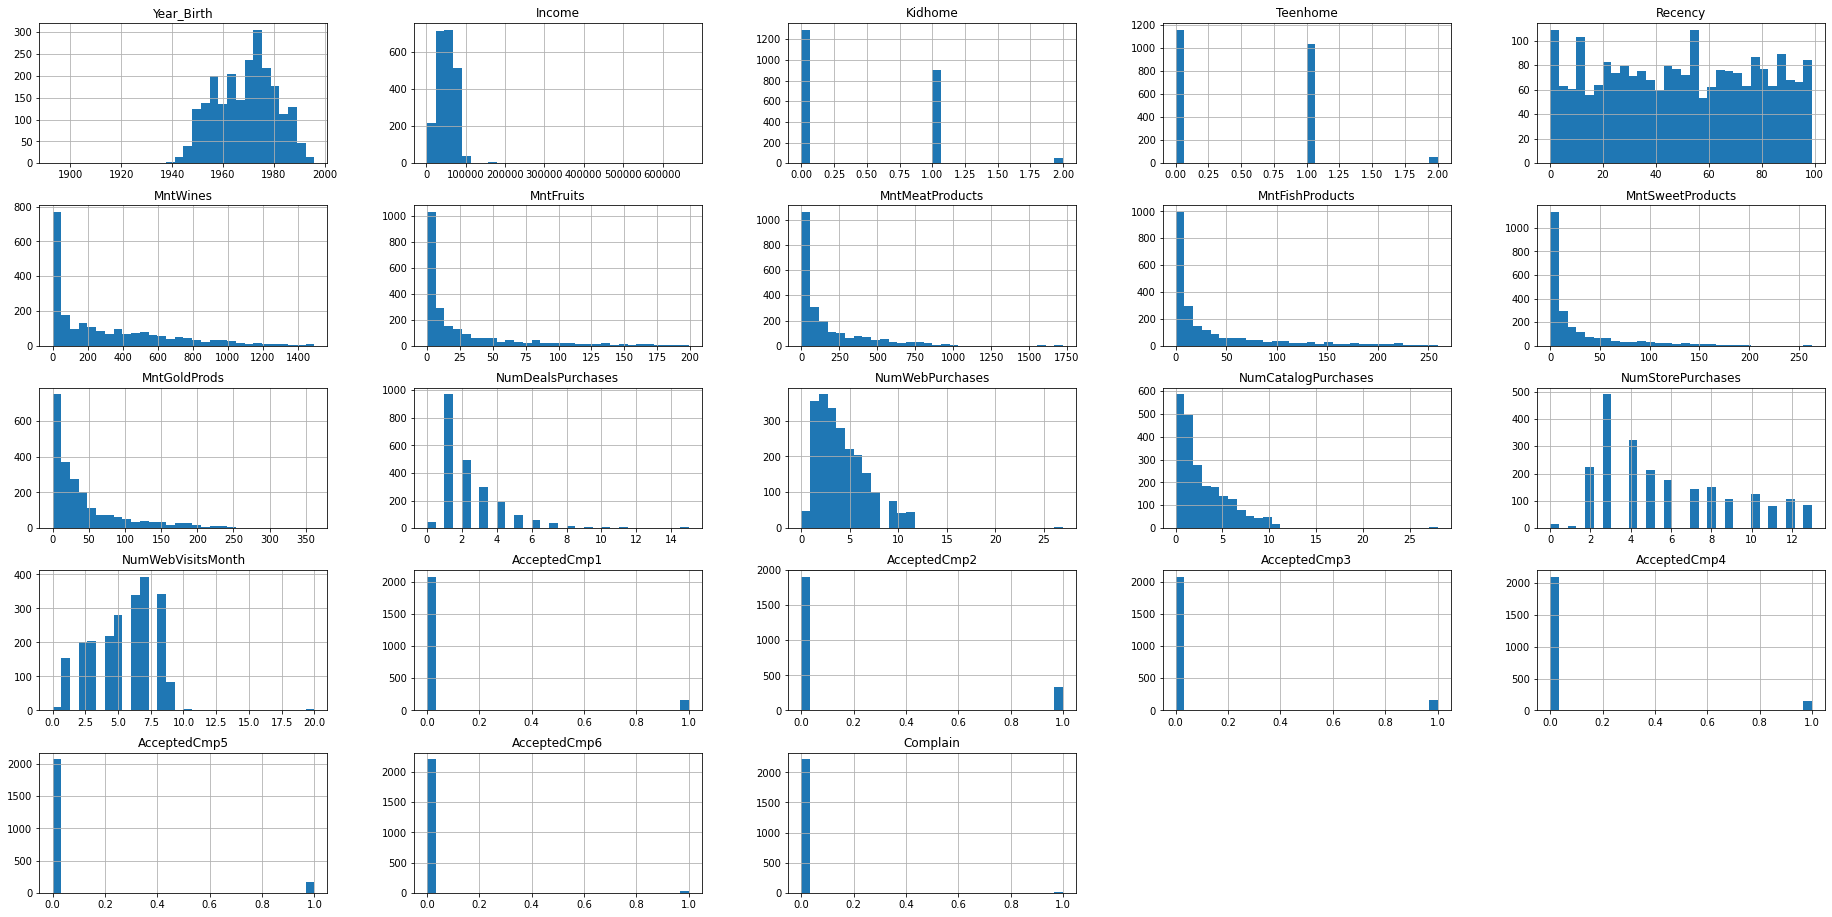

In [16]:
frame[numerical_variables].hist(bins=30,figsize=(32,16))

#### `Year_Birth`
Given the associated histogram, it seems like the minimum of 1893 in the data is definitively an outlier.

#### `Income`
Given the skewness of the `Income` variable, we might be better of use `logIncome`

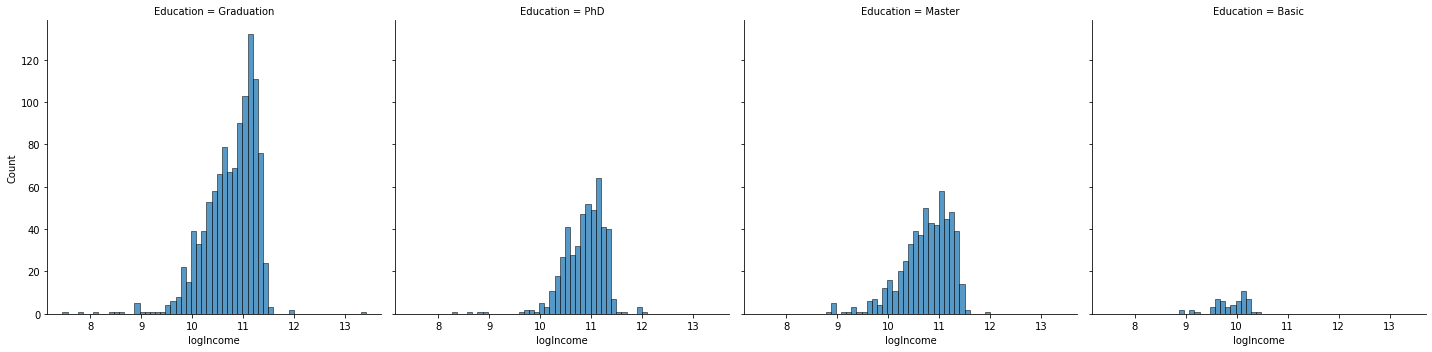

In [18]:
frame['logIncome'] = nplog(frame['Income'])
sns.displot(frame, x="logIncome", col="Education")